In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df_car = pd.read_csv('auto-mpg.csv')
df_car

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df_car.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

### 데이터 전처리

In [6]:
# horsepower 중간에 ?값이 있음 -> drop

cond = df_car[df_car['horsepower'] == "?"].index
cond

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [7]:
df_car.drop(cond, inplace=True)

In [8]:
# horsepower type이 objsect이므로 타입변환 필요하다

df_car['horsepower']=df_car['horsepower'].apply(lambda x : float(x))

# 다른방법
# df_car['horsepower']=df_car['horsepower'].astype(float)

In [9]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [10]:
# 주관식 drop

df_car.drop('car_name', axis=1,inplace=True)

### 상관관계분석

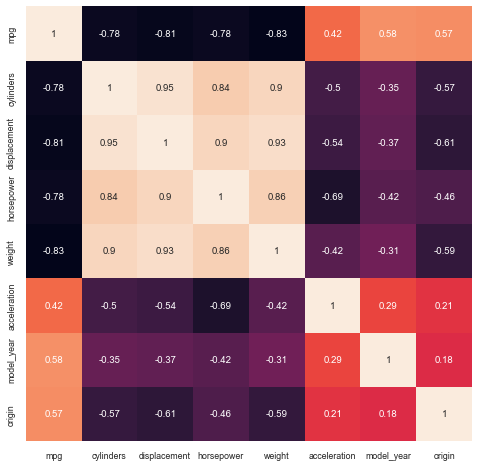

In [11]:
plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(df_car.corr(), annot=True, cbar=False)
plt.show()

In [27]:
df_car.corr().loc['cylinders':, 'mpg'].sort_values(ascending=False)

# 아래 feature가 강한 상관관계 이상이므로 아래 피쳐 모두 사용 

model_year      0.580541
origin          0.565209
acceleration    0.423329
cylinders      -0.777618
horsepower     -0.778427
displacement   -0.805127
weight         -0.832244
Name: mpg, dtype: float64

### training - linearRegression

In [13]:
# train, test 분할

X_train, X_test, y_train, y_test = train_test_split(df_car.loc[:,'cylinders':], df_car['mpg'], 
                                                    test_size=0.2,
                                                   shuffle=True,
                                                   random_state=12)

In [14]:
# 분할 데이터 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(313, 7) (79, 7) (313,) (79,)


In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### train, test set 검증

In [16]:
y_pred = lr.predict(X_test)
# y_pred

In [17]:
# MSE
mse_test = mean_squared_error(y_test, y_pred)
mse_test

14.153697740101135

In [18]:
rmse_test = np.sqrt(mse_test)
rmse_test

3.7621400479117115

In [19]:
r2_test = r2_score(y_test, y_pred)
r2_test

0.7918912906118833

In [20]:
train_predict = lr.predict(X_train)
mse_train = mean_squared_error(y_train, train_predict)
mse_train

10.085428513393234

In [21]:
rmse_train = np.sqrt(mse_train)
rmse_train

3.1757563687086

In [22]:
r2_train = r2_score(y_train, train_predict)
r2_train

0.8271220574112091

### 데이터 시각화

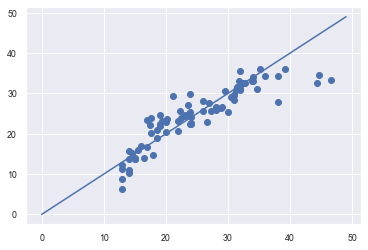

In [39]:
# x축이 실제값 y축이 예측 값이므로 두 값이 같을 수록 예측이 잘된다
# y=x선에 가까울수록 예측값이 실제값과 비슷하다.

a = np.arange(50)

plt.scatter(x=y_test, y=y_pred)
plt.plot(a,a)

<AxesSubplot:xlabel='mpg'>

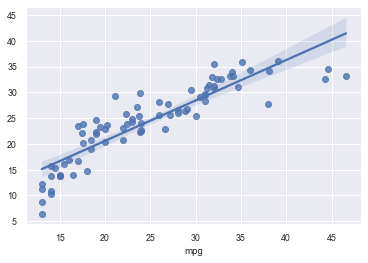

In [40]:
sns.regplot(x=y_test,y=y_pred)

<AxesSubplot:xlabel='stat', ylabel='val'>

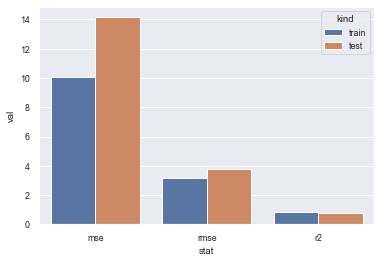

In [77]:
df= pd.DataFrame({'stat':['mse','mse','rmse','rmse','r2','r2'],
                 'val':[mse_train, mse_test, rmse_train, rmse_test,r2_train,r2_test],
                 'kind':['train','test','train','test','train','test']})

sns.barplot(data=df, x='stat', y='val', hue='kind')

### 차량연비예측 시스템 만들기

In [25]:
def predMPG():
    cylinders = input('cylinders : ')
    displacement = input('displacement : ')
    horsepower= input('horespower : ')
    weight = input('weight : ')
    acceleration = input('acceleration : ')
    model_year = input('model_year : ')
    origin=input('origin : ')
    
    data_list=[cylinders, displacement,horsepower, weight, acceleration, model_year, origin]
    
    data_list2 = [list(map(lambda x : float(x), data_list))]
    
    pred = lr.predict(data_list2)
    print(pred)
#     print(f'해당 차량의 연비는 {np.round(pred[0])}입니다.')

In [26]:
#8, 307.0, 130, 3504, 12.0, 70, 1  = 18

predMPG()

cylinders : 8
displacement : 307
horespower : 130
weight : 3504
acceleration : 12
model_year : 70
origin : 1
[14.76830358]
